In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import numpy as np
import scipy.stats as sts
from matplotlib import style

style.use('default')

## Import Data Files and Create DataFrames

In [2]:
# Files to load
city_data_to_load = pathlib.Path("resources/city_data.csv")
ride_data_to_load = pathlib.Path("resources/ride_data.csv")

In [3]:
# Read the city and ride data files and store them in a pandas DataFrames
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

print(city_df.head(10))
print(ride_df.head(10))

            city  driver_count   type
0    Richardfort            38  Urban
1   Williamsstad            59  Urban
2    Port Angela            67  Urban
3     Rodneyfort            34  Urban
4    West Robert            39  Urban
5   West Anthony            70  Urban
6    West Angela            48  Urban
7  Martinezhaven            25  Urban
8      Karenberg            22  Urban
9    Barajasview            26  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
5        South Latoya  2019-03-11 12:26:48   9.52  1994999424437
6       New Paulville  2019-02-27 11:17:56  43.25   793208410091
7        Simpsonburgh  2019-04-26 00:43:24  35.98   1119539277

<br>
<hr/>

## Inspect and Clean the Data (if needed)
### Inspect City DataFrame

In [4]:
# Get the columns and the rows that are not null
city_df.count()
# city_df.isnull().sum()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the data types of each column
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get the unique values of the type of city
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points for each type of city
city_df.groupby("type")["city"].count()

type
Rural       18
Suburban    36
Urban       66
Name: city, dtype: int64

### Inspect Ride DataFrame

In [8]:
# Get the columns and the rows that are not null
ride_df.count()
# ride_df.isnull().sum()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
# Get the data types of each column
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge the DataFrames

In [10]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


<br>
<hr/>

## Bubble Chart: Average Fare vs Number of Rides for Each City by City Type
### Create DataFrames

In [11]:
# Create DataFrames for each city type
urban_cities_df = pyber_df[pyber_df["type"] == "Urban"]
suburban_cities_df = pyber_df[pyber_df["type"] == "Suburban"]
rural_cities_df = pyber_df[pyber_df["type"] == "Rural"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Ride Counts for Each City

In [12]:
# Get ride counts per city for each city type
urban_ride_count = urban_cities_df.groupby("city")["ride_id"].count()
suburban_ride_count = suburban_cities_df.groupby("city")["ride_id"].count()
rural_ride_count = rural_cities_df.groupby("city")["ride_id"].count()

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

### Average Fare for Each City

In [13]:
# Get average fare per city for each city type
urban_avg_fare = urban_cities_df.groupby("city")["fare"].mean()
suburban_avg_fare = suburban_cities_df.groupby("city")["fare"].mean()
rural_avg_fare = rural_cities_df.groupby("city")["fare"].mean()

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

### Average Number of Drivers for Each City

In [14]:
# Get average number of drivers per city for each city type
urban_driver_count = urban_cities_df.groupby("city")["driver_count"].mean()
suburban_driver_count = suburban_cities_df.groupby("city")["driver_count"].mean()
rural_driver_count = rural_cities_df.groupby("city")["driver_count"].mean()

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

### Bubble Chart

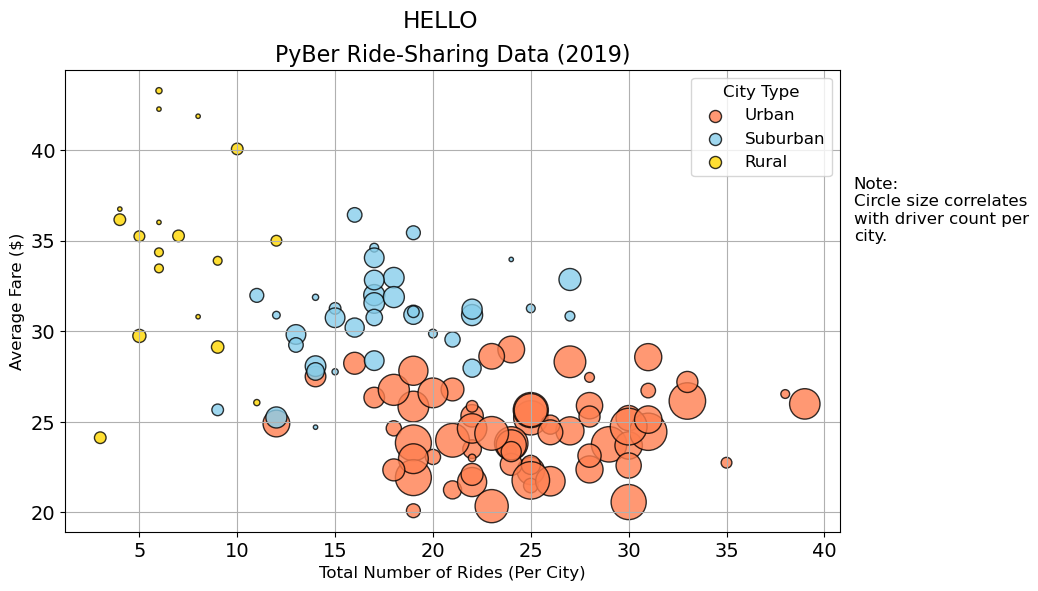

In [46]:
# Build the bubble chart
plt.subplots(figsize=(10, 6))

# Plot urban cities
plt.scatter(x=urban_ride_count,
            y=urban_avg_fare,
            s=10*urban_driver_count,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban")

# Plot suburban cities
plt.scatter(x=suburban_ride_count,
            y=suburban_avg_fare,
            s=10*suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Suburban")

# Plot rural cities
plt.scatter(x=rural_ride_count,
            y=rural_avg_fare,
            s=10*rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Rural")

# Add graph properties
plt.title(label="PyBer Ride-Sharing Data (2019)", fontsize=16)
plt.xlabel(xlabel="Total Number of Rides (Per City)", fontsize=12)
plt.ylabel(ylabel="Average Fare ($)", fontsize=12)
plt.grid(True)


# Create a legend
lgnd = plt.legend(fontsize=12,
                  scatterpoints=1,
                  loc="best",
                  title="City Type")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(41.5, 35, "Note:\nCircle size correlates\nwith driver count per\ncity.", fontsize=12)

# Save the figure
plt.savefig("analysis/fare_vs_rides_bubble_chart.png", bbox_inches="tight")
plt.savefig("analysis/fare_vs_rides_bubble_chart.svg", bbox_inches="tight")
plt.show()

<br>
<hr/>

## Calculate Summary Statistics

### City Type DataFrames: describe()

In [16]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [17]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [18]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


<hr/>

### Ride Count Series: describe()

In [19]:
# Get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [20]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [21]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

<hr/>

### Ride Count Series: mean(), median(), mode()

In [22]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [23]:
# Calculate the median of the ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [24]:
# Calculate the mode of the ride count for each city type
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

<hr/>

### Ride Count Series: np.mean(), np.median(), sts.mode()
#### Urban Cities

In [25]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


#### Suburban Cities

In [26]:
# Calculate the measures of central tendency for the ride count for the suburban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


#### Rural Cities

In [27]:
# Calculate the measures of central tendency for the ride count for the rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


<hr/>

### Fares: np.mean(), np.median(), sts.mode()
#### Urban Cities

In [28]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


#### Suburban Cities

In [29]:
# Get the fares for the suburban cities
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


#### Rural Cities

In [30]:
# Get the fares for the rural cities
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


<hr/>

### Driver Count: np.mean(), np.median(), sts.mode()
#### Urban Cities

In [31]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']

# Calculate the measures of central tendency for the driver count for the urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban trips is {median_urban_drivers:.1f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban trips is {mode_urban_drivers}.")

The mean driver count for urban trips is 36.68.
The median driver count for urban trips is 37.0.
The mode driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


#### Suburban Cities

In [32]:
# Get the driver count data from the suburban cities
suburban_drivers = suburban_cities_df['driver_count']

# Calculate the measures of central tendency for the driver count for the suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban trips is {median_suburban_drivers:.1f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban trips is {mode_suburban_drivers}.")

The mean driver count for suburban trips is 13.71.
The median driver count for suburban trips is 16.0.
The mode driver count for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


#### Rural Cities

In [33]:
# Get the driver count data from the rural cities
rural_drivers = rural_cities_df['driver_count']

# Calculate the measures of central tendency for the driver count for the rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural trips is {median_rural_drivers:.1f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural trips is {mode_rural_drivers}.")

The mean driver count for rural trips is 4.30.
The median driver count for rural trips is 4.0.
The mode driver count for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


<hr/>

### Box-and-Whisker Plots
#### Ride Count

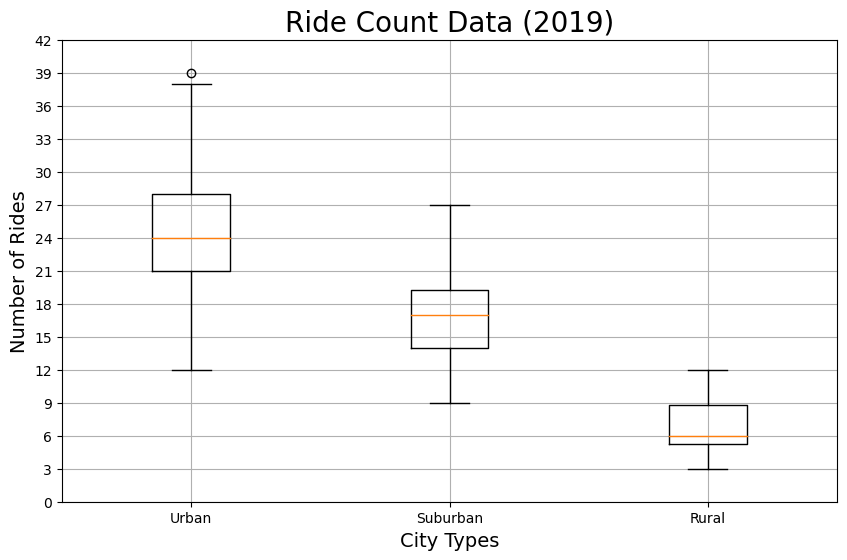

In [34]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

# Labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)

# Make the 3 box-and-whisker plots on one axes
ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/ride_count_box-and-whisker_plot.png", bbox_inches="tight")
plt.savefig("analysis/ride_count_box-and-whisker_plot.svg", bbox_inches="tight")
plt.show()

In [35]:
# Get the city that matches 39 (the outlier seen in the box-and-whisker plot)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


#### Ride Fare

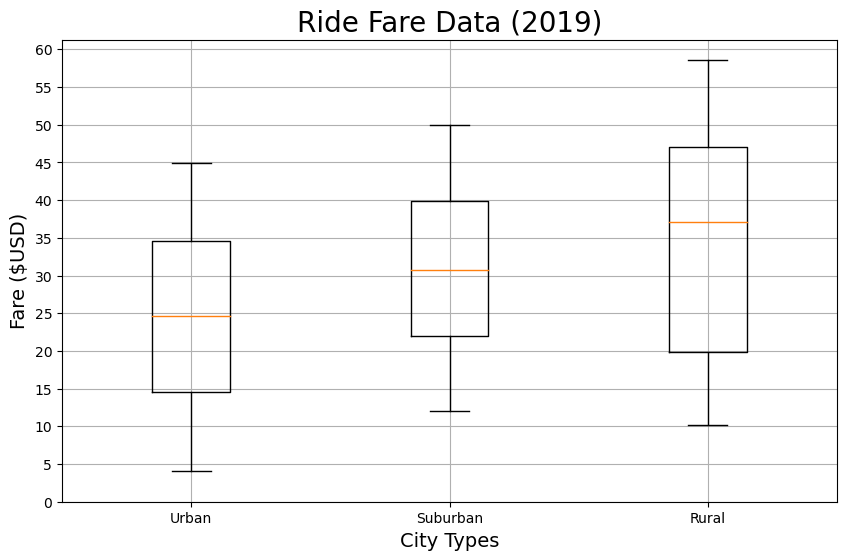

In [36]:
# Add all ride fare box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]

# Labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

# Make the 3 box-and-whisker plots on one axes
ax.boxplot(ride_fare_data, labels=x_labels)

ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/fares_box-and-whisker_plot.png", bbox_inches="tight")
plt.savefig("analysis/fares_box-and-whisker_plot.svg", bbox_inches="tight")
plt.show()

#### Driver Count

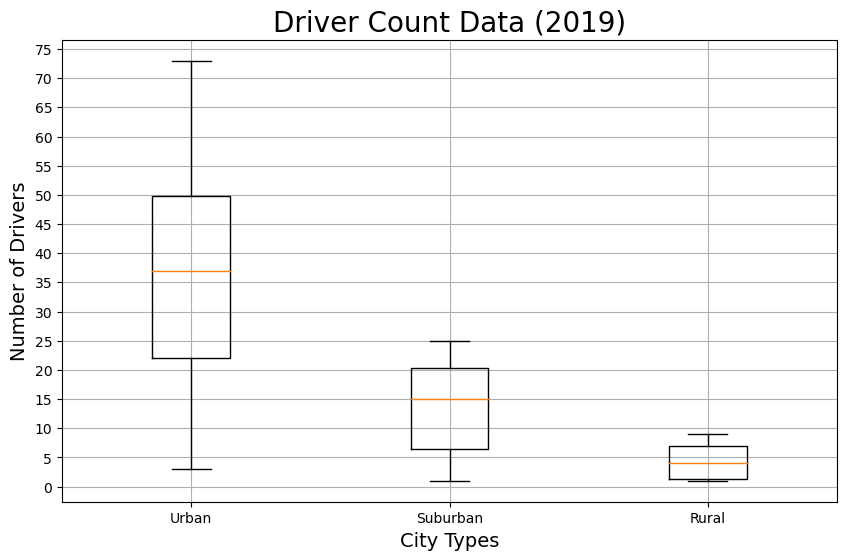

In [37]:
# Add all ride driver count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]

# Labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

# Make the 3 box-and-whisker plots on one axes
ax.boxplot(driver_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/driver_count_box-and-whisker_plot.png", bbox_inches="tight")
plt.savefig("analysis/driver_count_box-and-whisker_plot.svg", bbox_inches="tight")
plt.show()

## Percentage of Total Fares by City Type

In [38]:
# Calculate the percentage of fare for each city type. Divide each "fares by city type" sum by the total 
# fare sum and convert to a percentage.
fare_percents = (pyber_df.groupby(pyber_df["type"])["fare"].sum() / pyber_df["fare"].sum()) * 100
fare_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [39]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

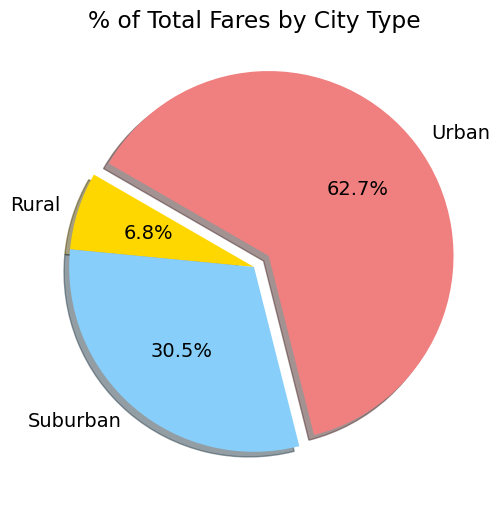

In [40]:
# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(
    fare_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    startangle=150
)
plt.title("% of Total Fares by City Type")



# Save Figure
plt.savefig("analysis/fares_by_city_type_pie_chart.png", bbox_inches="tight")
plt.savefig("analysis/fares_by_city_type_pie_chart.svg", bbox_inches="tight")

plt.show()

## Percentage of Total Rides by City Type

In [41]:
# Calculate the percentage of rides for each city type. Divide each "rides by city type" count by the total 
# ride count and convert to a percentage.
ride_percents = (pyber_df.groupby(pyber_df["type"])["ride_id"].count() / pyber_df["ride_id"].count()) * 100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

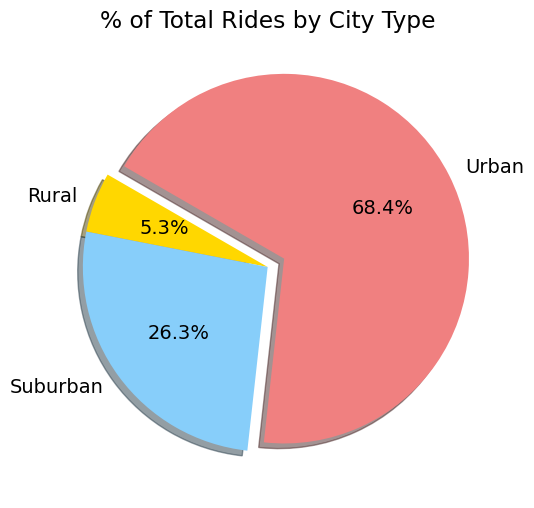

In [42]:
# Build the percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(
    ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    startangle=150
)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/rides_by_city_type_pie_chart.png", bbox_inches="tight")
plt.savefig("analysis/rides_by_city_type_pie_chart.svg", bbox_inches="tight")

plt.show()

## Percentage of Total Drivers by City Type

In [43]:
# Calculate the percentage of drivers for each city type. Divide each "drivers by city type" sum by the total 
# driver sum and convert to a percentage. Use city_df, where driver count shows up once for each city.
driver_percents = (city_df.groupby(city_df["type"])["driver_count"].sum() / city_df["driver_count"].sum()) * 100
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

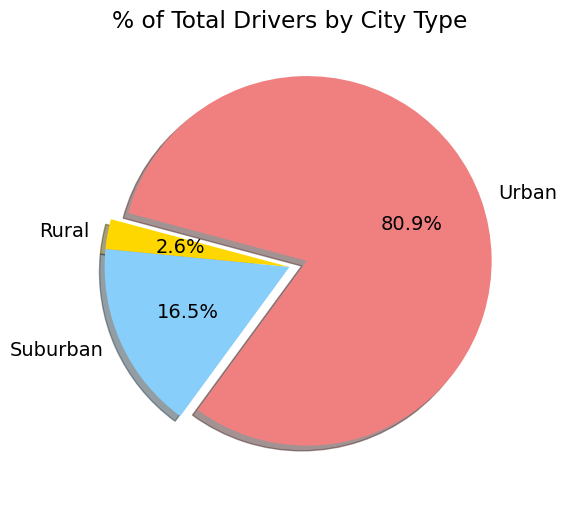

In [44]:
# Build the percentage of drivers by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(
    driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    startangle=165
)
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/drivers_by_city_type_pie_chart.png", bbox_inches="tight")
plt.savefig("analysis/drivers_by_city_type_pie_chart.svg", bbox_inches="tight")

plt.show()